# Part 4

In [390]:
#imports necessary packages
import geopandas as gpd
import numpy as np
import csv
import pandas as pd

In [391]:
#imports data
fp = "./Part4/cb_2017_41_bg_500k.shp"
pop = pd.read_csv("./Part4/Population.csv")
data = gpd.read_file(fp)


In [392]:
#creates COUNTYFP AND AREA Column
pop['COUNTYFP'] = ["001", "003", "005", "007", "009", "011", "013", "015", "017", "019", "021", "023", "025", "027", "029", "031", "033", "035", "037", "039", "041", "043", "045", "047", "049", "051", "053", "055", "057", "059", "061", "063", "065", "067", "069", "071"]
pop ['Area'] = 0 

In [393]:
counter = 0
for row in pop.COUNTYFP: 
    A = data['COUNTYFP'] == row
    subset = data[A]
    total_area = sum(subset['ALAND'])
    pop.Area[counter] = total_area + pop.Area[counter]
    counter += 1

/Users/Emmanuel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [394]:
#converts to INT
pop['Population2012'] = pop['Population2012'].astype(int)
pop['Population2018'] = pop['Population2018'].astype(int)

### Part 4.1

In [395]:
#calculates density of population
pop["Area"] = pop["Area"] * .0000003861

In [396]:
pop["urban2018"] = np.where((pop["Population2018"] / (pop["Area"])) >= 1000, 'urban', 'non-urban')
pop

,County,Population2018,Population2012,COUNTYFP,Area,urban2018
0,Baker County,16054,15914,001,3067.949414,non-urban
1,Benton County,90951,86436,003,675.177907,non-urban
2,Clackamas County,412672,383628,005,1870.673429,non-urban
3,Clatsop County,39182,37339,007,828.260280,non-urban
4,Columbia County,51782,49233,009,657.983225,non-urban
5,Coos County,63888,62637,011,1596.017710,non-urban
6,Crook County,23123,20666,013,2978.876901,non-urban
7,Curry County,22669,22274,015,1628.403145,non-urban
8,Deschutes County,186875,161887,017,3017.588958,non-urban
9,Douglas County,109405,107166,019,5035.631740,non-urban


### Part 4.2

In [397]:
urban_counter = 0
for row in pop['urban2018']:
    if row == 'urban':
        urban_counter += 1
        

In [398]:
#calculates percentage of groupds that are urban in washington
percent_State_Urban = (float(urban_counter)/36) * 100
print percent_State_Urban

2.77777777778


### Part 4.3

In [399]:
urban_land = pop

urban_land = urban_land.drop(urban_land[urban_land["urban2018"] != "urban"].index)

In [400]:
land_sum = pop['Area'].sum()

urban_land_sum = urban_land['Area'].sum()

In [401]:
percent_urbanized = (urban_land_sum / land_sum) * 100

print percent_urbanized

0.4491465339116722


### Part 4.4

In [402]:
#calculates density of population
pop["urban2012"] = np.where((pop["Population2012"]/pop["Area"]) >= 1000, 'urban', 'non-urban')

In [403]:
#initializes a column and then compares columns to determine if there is a change
pop['ClassChange'] = ''
pop["ClassChange"] = np.where((pop['urban2012'] == pop['urban2018']), 'no change in category', pop['ClassChange'])

In [404]:
#keywords are used similarly like the code above, determines change but had to be done slightly differently
keyword1 = 'urban'
keyword2 = 'non-urban'

pop["ClassChange"] = np.where((pop['urban2012'] == keyword2) & (pop['urban2018'] == keyword1), 'urbanized', pop['ClassChange'])
pop["ClassChange"] = np.where((pop['urban2012'] == keyword1) & (pop['urban2018'] == keyword2), 'de-urbanized', pop['ClassChange'])

### Part 4.6

In [405]:
#Merge data to shape file
data = pd.merge(data, pop)
data

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,County,Population2018,Population2012,Area,urban2018,urban2012,ClassChange
0,41,023,960100,3,1500000US410239601003,410239601003,3,BG,2127514607,234152,"POLYGON ((-118.962064 44.283455, -118.957377 4...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
1,41,023,960200,4,1500000US410239602004,410239602004,4,BG,351702339,163990,"POLYGON ((-119.113351 44.419365, -119.111908 4...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
2,41,023,960200,1,1500000US410239602001,410239602001,1,BG,3530799118,308530,"POLYGON ((-119.656838 44.220277, -119.654993 4...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
3,41,023,960200,2,1500000US410239602002,410239602002,2,BG,514899640,77636,"POLYGON ((-119.314756 44.382487, -119.312512 4...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
4,41,023,960100,2,1500000US410239601002,410239601002,2,BG,2390106916,1025653,"POLYGON ((-118.959926 44.73247, -118.957159 44...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
5,41,023,960200,5,1500000US410239602005,410239602005,5,BG,61125661,0,"POLYGON ((-118.95571 44.362664, -118.956205 44...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
6,41,023,960200,3,1500000US410239602003,410239602003,3,BG,177599197,12150,"POLYGON ((-119.086742 44.29319599999999, -119....",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
7,41,023,960100,1,1500000US410239601001,410239601001,1,BG,2573180312,71696,"POLYGON ((-119.672228 44.995117, -119.667065 4...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
8,41,057,960400,6,1500000US410579604006,410579604006,6,BG,305020776,0,"POLYGON ((-123.792599 45.457562, -123.784822 4...",Tillamook County,26690,25326,1102.362969,non-urban,non-urban,no change in category
9,41,057,960400,1,1500000US410579604001,410579604001,1,BG,157655547,0,"POLYGON ((-123.848597 45.496433, -123.843517 4...",Tillamook County,26690,25326,1102.362969,non-urban,non-urban,no change in category


<IPython.core.display.Javascript object>


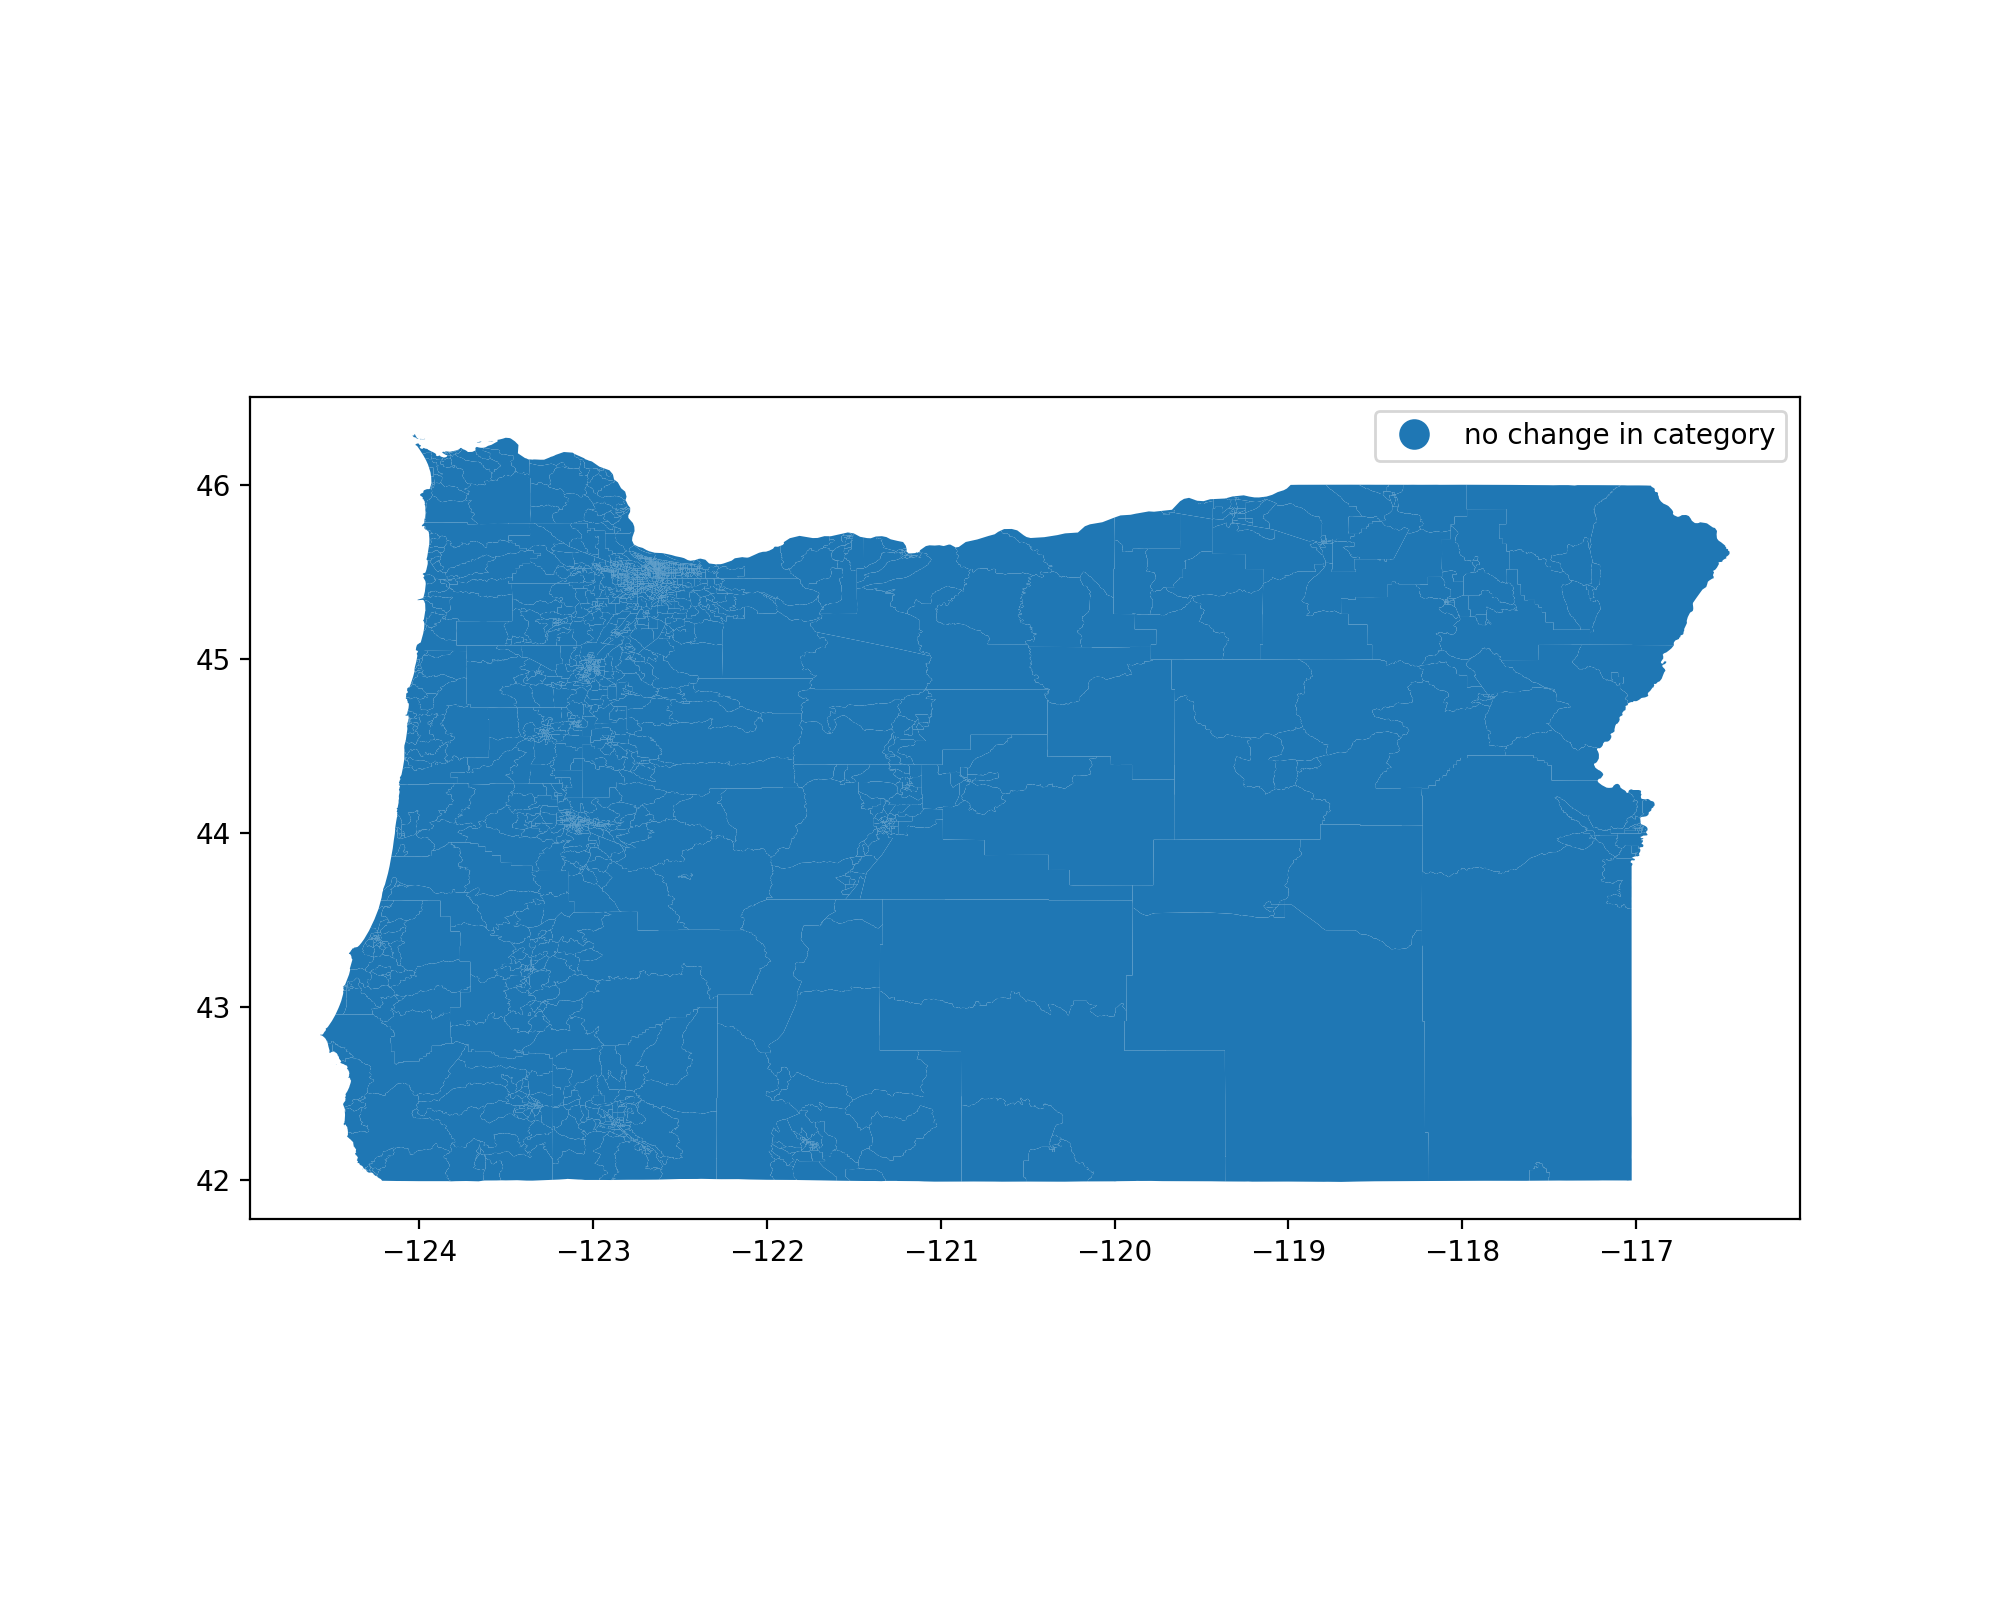

In [408]:
#Map 1 of change in category
%matplotlib notebook

#removes non-populated blocks (mostly ones that are water)
mapdata = data.drop(data[data['Population2018'] == 0].index)
mapdata.plot(column = "ClassChange",figsize= (10,8), legend = True)

<IPython.core.display.Javascript object>


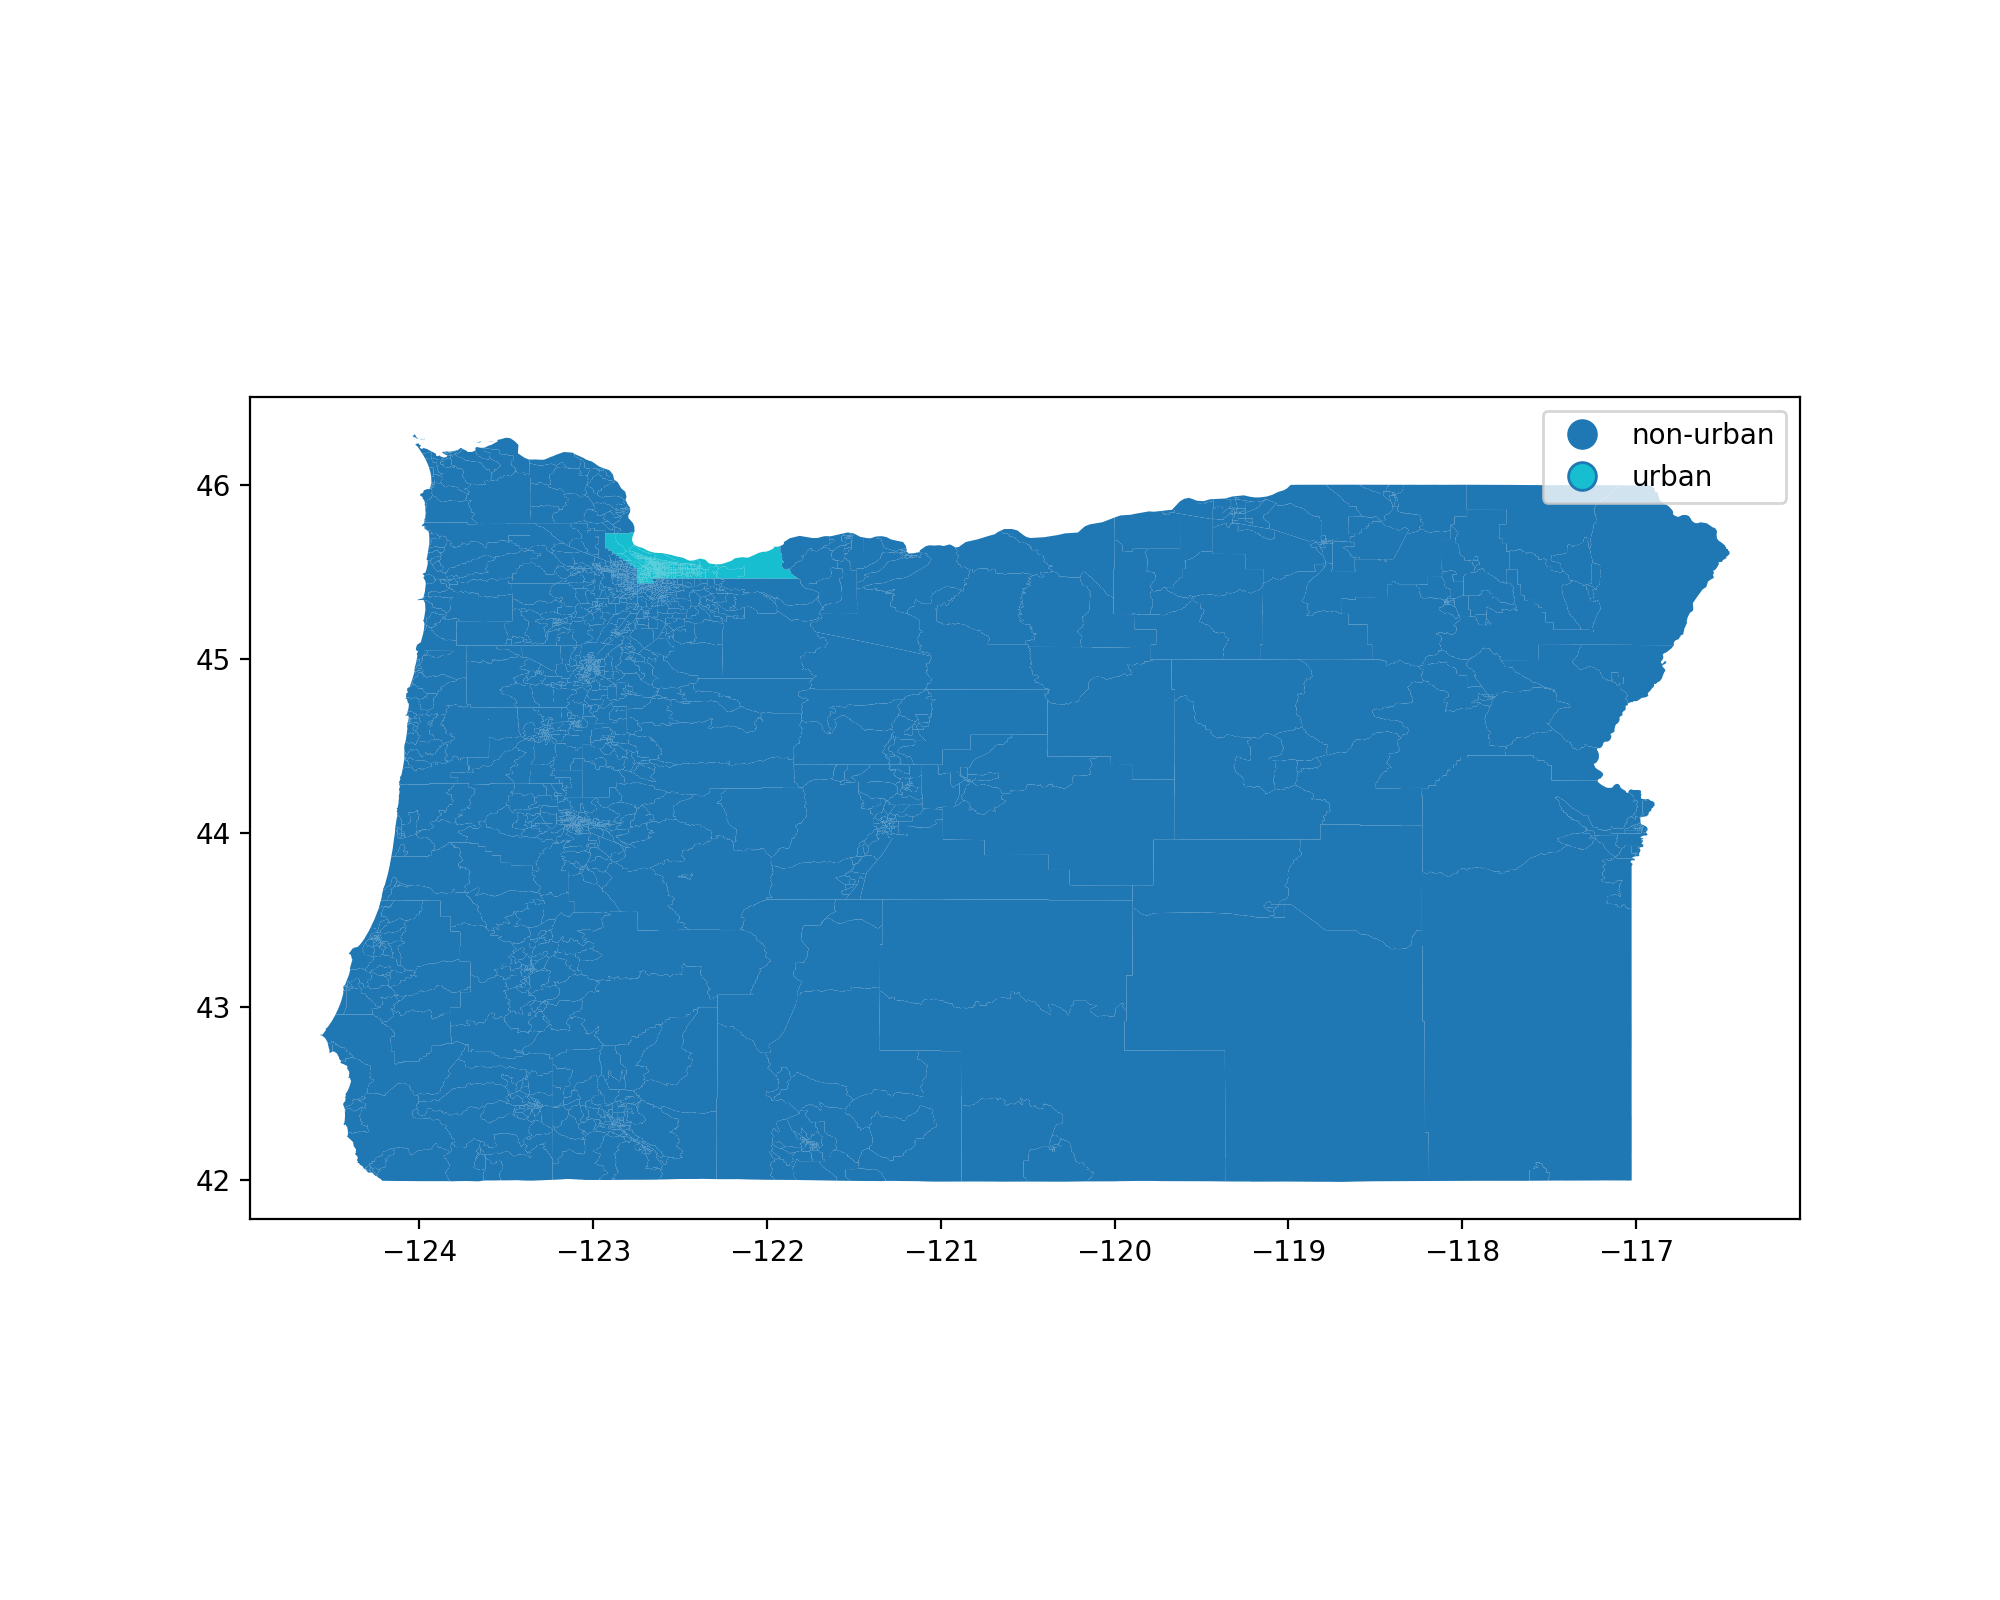

In [407]:
#Map 2 of urban and non-urban
%matplotlib notebook
mapdata.plot(column = "urban2018",figsize= (10,8), legend = True)